<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab1(Linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashyaks/compute_tasks/main/foodtruck.txt')
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Text(0.5, 1.0, 'Population vs Profit')

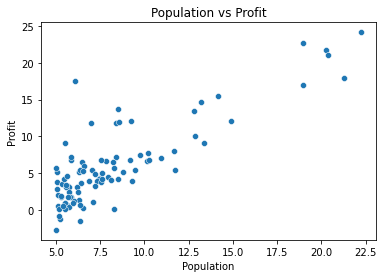

In [3]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = df)
ax.set_title("Population vs Profit")

In [4]:
def cost_function(x,y,theta):
  m = len(y)
  y_pred = x.dot(theta)
  error = (y_pred - y)**2
  return 1/(2*m) * np.sum(error)

In [5]:
m = df.Population.size
x = np.append(np.ones((m,1)), df.Population.values.reshape(m,1), axis = 1)
y = df.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(x,y,theta)

32.072733877455676

In [6]:
def gradient_descent(x,y,theta,alpha,iteration):
  m = len(y)
  costs = []
  for i in range(iteration):
    y_pred = x.dot(theta)
    error = np.dot(x.transpose(),(y_pred - y))
    theta = alpha * 1/m * error
    costs.append(cost_function(x,y,theta))
  return theta, costs

In [7]:
theta, costs = gradient_descent(x,y,theta,alpha = 0.01 ,iteration = 1)

print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x) = -0.06 + -0.65x1


In [8]:
'''for i in range(0,20):
  iters = i
  theta, costs = gradient_descent(x,y,theta,alpha = 0.01 ,iteration = iters)
  print(iters)
  print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))
'''

'for i in range(0,20):\n  iters = i\n  theta, costs = gradient_descent(x,y,theta,alpha = 0.01 ,iteration = iters)\n  print(iters)\n  print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))\n'

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
theta_0  = np.linspace(-10,10,100)

theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros(((len(theta_0)), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t =np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(x,y,t)


ValueError: ignored

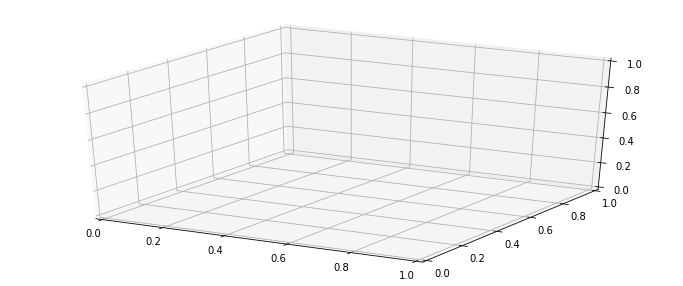

In [11]:
fig = plt.figure(figsize = (12,5))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'virdis')
fig.colorbar(surf, shrink = 0.5, aspect  =5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_jlabel("$J(\Theta)$")

ax.view_init(30,330)

plt.show()

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

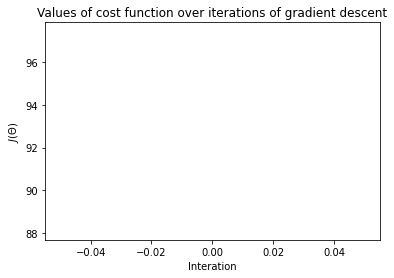

In [12]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


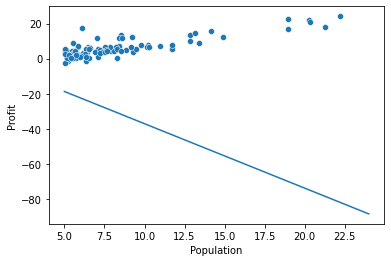

In [11]:
theta = np.squeeze(theta)

sns.scatterplot(x = "Population", y = "Profit", data = df)

x_value = [x for x in range(5,25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value, y_value)

